# Setting a minimum activity threshold

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import nengo

In [2]:
# create a configuration for a threshold of 0.3
threshold = 0.4
thresh_config = nengo.presets.ThresholdingEnsembles(threshold)

with nengo.Network() as model:
    # make a cycling ramp input to show the threshold is working
    in_node = nengo.Node(lambda t: t % 1)

    # make an ensemble with the thresholding configuration
    with thresh_config:
        thresh_ens = nengo.Ensemble(100, 1)

    nengo.Connection(in_node, thresh_ens)
    in_probe = nengo.Probe(in_node)
    ens_probe = nengo.Probe(thresh_ens, synapse=0.01)

In [3]:
with nengo.Simulator(model) as sim:
    sim.run(1.0)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

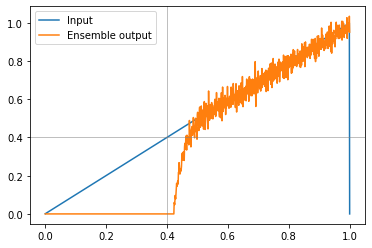

In [4]:
plt.plot(sim.trange(), sim.data[in_probe], label="Input")
plt.plot(sim.trange(), sim.data[ens_probe], label="Ensemble output")
plt.axhline(threshold, c="0.5", lw=0.5)
plt.axvline(threshold, c="0.5", lw=0.5)
plt.legend(loc="best")